# DDMI Agentic Trading

## Cell 1 
### Making sure data is correctly loaded

In [1]:
import sys 
sys.path.append('../')
from src.data_loader import download_prices

# Download fresh data
prices = download_prices()

# Display tail
prices.tail()

Saved raw prices to /Users/sanduandrei/Desktop/DDMI-AgenticTrading/data/raw/prices_yahoo.csv


Price            Close                               High              \
Ticker             QQQ        SPXL        TLT         QQQ        SPXL   
Date                                                                    
2025-11-07  609.739990  212.960007  89.570000  609.950012  213.039993   
2025-11-10  623.229980  222.660004  89.550003  624.309998  223.509995   
2025-11-11  621.570007  224.160004  89.959999  622.719971  224.830002   
2025-11-12  621.080017  224.520004  90.120003  624.859985  226.149994   
2025-11-13  608.400024  213.389999  89.379997  618.119995  222.039993   

Price                         Low                               Open  \
Ticker            TLT         QQQ        SPXL        TLT         QQQ   
Date                                                                   
2025-11-07  89.870003  598.669983  203.630005  89.360001  608.309998   
2025-11-10  89.669998  616.890015  216.759995  89.389999  618.919983   
2025-11-11  90.070000  617.520020  220.130005  89.779999  620.570007   
2025-11-12  90.320000  617.809998  222.220001  89.879997  624.840027   
2025-11-13  89.940002  606.085510  211.890106  89.379997  617.565002   

Price                                Volume                     
Ticker            SPXL        TLT       QQQ     SPXL       TLT  
Date                                                            
2025-11-07  209.990005  89.360001  81835400  6900300  28530100  
2025-11-10  218.830002  89.489998  55919900  3136600  24093500  
2025-11-11  221.300003  89.949997  44868800  4998900  18942300  
2025-11-12  226.029999  89.949997  47444400  2485100  23594900  
2025-11-13  221.770004  89.820000  69823180  5176011  33721619

## Cell 2
### Visualising loaded data for context

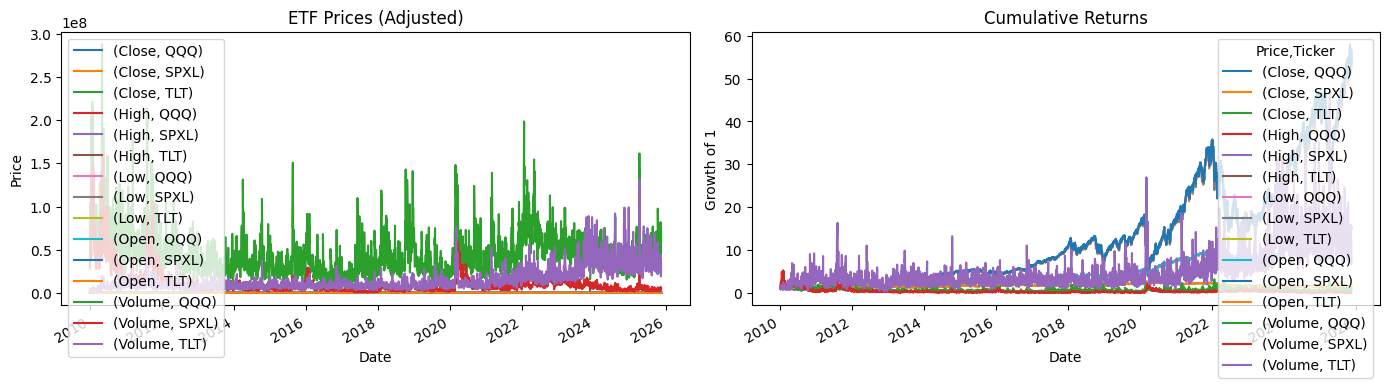

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharex=False)

prices.plot(ax=ax[0])
ax[0].set_title("ETF Prices (Adjusted)")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].legend(loc="upper left")

ret = prices.pct_change().dropna()
cumret = (1 + ret).cumprod()

cumret.plot(ax=ax[1])
ax[1].set_title("Cumulative Returns")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Growth of 1")

plt.tight_layout()
plt.show()


## Cell 3
### Loading processed prices and visualising them

In [3]:
from src.data_loader import build_processed_prices, load_processed_prices

# Build once (or force when you change logic)
prices = build_processed_prices(force_rebuild=False)

# or, for a lighter call in the future:
# prices = load_processed_prices()
prices.head()



Loading existing processed prices from /Users/sanduandrei/Desktop/DDMI-AgenticTrading/data/processed/prices_daily.parquet


,date,ticker,open,high,low,close,adj_close,volume,ret_1d,log_ret_1d,ret_fwd_1d,ret_fwd_5d,vol_20d
0,2010-01-04,QQQ,40.315246,40.454474,40.263034,40.393559,40.393559,62822800.0,NaN,NaN,0.000000,-0.001292,NaN
3,2010-01-05,QQQ,40.367454,40.463174,40.167314,40.393559,40.393559,62935600.0,0.000000,0.000000,-0.006031,-0.013787,NaN
6,2010-01-06,QQQ,40.376181,40.506705,40.089021,40.149933,40.149933,96033000.0,-0.006031,-0.006050,0.000650,0.004551,NaN
9,2010-01-07,QQQ,40.210837,40.263049,39.958485,40.176029,40.176029,77094100.0,0.000650,0.000650,0.008230,0.004765,NaN
12,2010-01-08,QQQ,40.088999,40.506683,39.967175,40.506683,40.506683,88886600.0,0.008230,0.008196,-0.004082,-0.015037,NaN


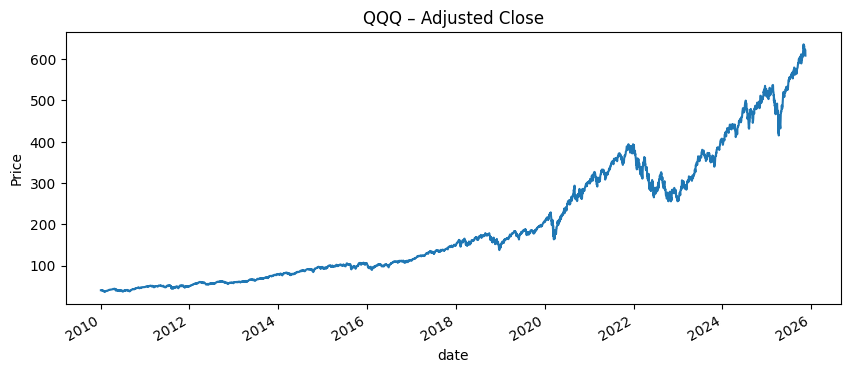

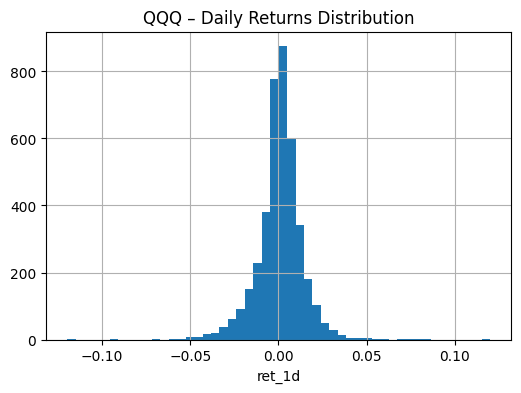

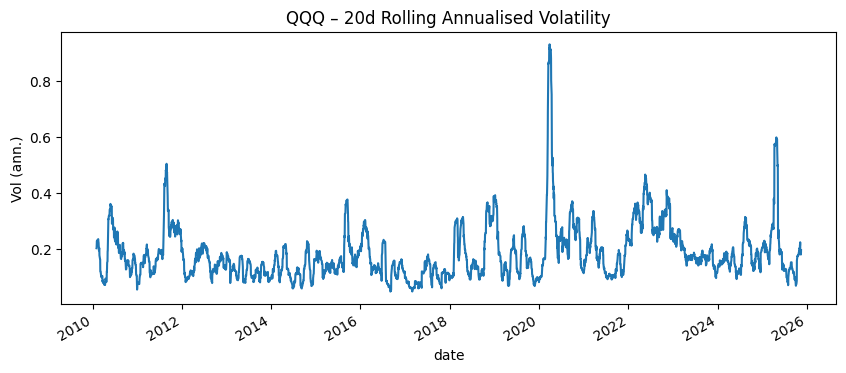

In [9]:
import matplotlib.pyplot as plt
from src.data_loader import build_processed_prices, load_processed_prices

qqq = prices[prices["ticker"] == "QQQ"].set_index("date")

plt.figure(figsize=(10, 4))
spy["adj_close"].plot()
plt.title("QQQ – Adjusted Close")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(6, 4))
spy["ret_1d"].hist(bins=50)
plt.title("QQQ – Daily Returns Distribution")
plt.xlabel("ret_1d")
plt.show()

plt.figure(figsize=(10, 4))
spy["vol_20d"].plot()
plt.title("QQQ – 20d Rolling Annualised Volatility")
plt.ylabel("Vol (ann.)")
plt.show()
